In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler


#uploading the csv

churn = pd.read_csv(r'C:\Users\abram\Downloads\churn_clean.csv')
print(churn.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [2]:
churn_clean=churn.select_dtypes(exclude='object')
print(churn_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Zip                   10000 non-null  int64  
 2   Lat                   10000 non-null  float64
 3   Lng                   10000 non-null  float64
 4   Population            10000 non-null  int64  
 5   Children              10000 non-null  int64  
 6   Age                   10000 non-null  int64  
 7   Income                10000 non-null  float64
 8   Outage_sec_perweek    10000 non-null  float64
 9   Email                 10000 non-null  int64  
 10  Contacts              10000 non-null  int64  
 11  Yearly_equip_failure  10000 non-null  int64  
 12  Tenure                10000 non-null  float64
 13  MonthlyCharge         10000 non-null  float64
 14  Bandwidth_GB_Year     10000 non-null  float64
 15  Item1               

In [3]:
churn_clean.drop(['CaseOrder','Zip', 'Children', 'Email', 'Contacts', 'Item1', 'Item2', 'Item3', 'Item4',
                 'Item5', 'Item6', 'Item7', 'Item8'], axis=1, inplace = True)

print(churn_clean.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Lat                   10000 non-null  float64
 1   Lng                   10000 non-null  float64
 2   Population            10000 non-null  int64  
 3   Age                   10000 non-null  int64  
 4   Income                10000 non-null  float64
 5   Outage_sec_perweek    10000 non-null  float64
 6   Yearly_equip_failure  10000 non-null  int64  
 7   Tenure                10000 non-null  float64
 8   MonthlyCharge         10000 non-null  float64
 9   Bandwidth_GB_Year     10000 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 781.4 KB
None


In [4]:
robust=RobustScaler()
churn_scaled=robust.fit_transform(churn_clean)
churn_scaled


array([[ 2.49150047, -2.67486933, -0.23109413, ..., -0.53461297,
         0.08181679, -0.54601855],
       [ 0.72920498,  0.21642847,  0.60623492, ..., -0.63988949,
         1.23689002, -0.56982572],
       [ 0.88100806, -2.07882957,  0.06633146, ..., -0.36735607,
        -0.12405657, -0.28159143],
       ...,
       [-0.57285501, -0.73690422, -0.20148833, ...,  0.22378478,
         0.04097408,  0.20226104],
       [-0.85965576,  0.16396251,  2.62787611, ...,  0.66586433,
         1.40134341,  0.73314055],
       [-0.69296594,  0.25787352,  0.74975865, ...,  0.52127068,
         0.82295943,  0.59269989]])

In [14]:

churn_scaled_df = pd.DataFrame(churn_scaled, columns=churn_clean.columns)
churn_scaled_df.describe()


,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
count,10000.000000,1.000000e+04,10000.000000,10000.000000,1.000000e+04,1.000000e+04,10000.000000,10000.000000,10000.000000,1.000000e+04
mean,-0.094342,-1.685139e-01,0.550769,0.002178,1.950629e-01,-4.229485e-03,0.398000,-0.016884,0.084603,2.593407e-02
std,0.803743,8.918490e-01,1.161118,0.574969,8.288863e-01,7.531802e-01,0.635953,0.493690,0.706818,5.024047e-01
min,-3.167691,-4.929329e+00,-0.234151,-0.972222,-9.647423e-01,-2.510284e+00,0.000000,-0.642810,-1.440295,-7.182223e-01
25%,-0.599250,-5.392477e-01,-0.174779,-0.500000,-4.099145e-01,-5.062538e-01,0.000000,-0.513662,-0.452724,-4.697059e-01
50%,0.000000,4.181226e-16,0.000000,0.000000,1.069362e-16,-2.247551e-16,0.000000,0.000000,0.000000,-5.225854e-17
75%,0.400750,4.607523e-01,0.825221,0.500000,5.900855e-01,4.937462e-01,1.000000,0.486338,0.547276,5.302941e-01
max,4.618550,1.309336e+00,8.764240,1.000000,6.634934e+00,2.831664e+00,6.000000,0.682736,2.019171,8.918939e-01


In [15]:
churn_scaled.shape
churn_scaled_df.to_csv('churn_scaled212.csv', encoding='utf-8')

In [7]:
pca=PCA(n_components=10)
churn_PCA=pca.fit_transform(churn_scaled)
churn_PCA

array([[-1.29318762,  3.19732264, -0.39528755, ...,  0.70132247,
        -0.40612189, -0.02283271],
       [-0.17873971, -0.10208245, -0.55980653, ...,  0.69410363,
         0.78790023, -0.02433838],
       [-0.61365004,  2.09511549, -0.95084137, ...,  0.61818166,
         0.08264951,  0.03964869],
       ...,
       [-0.5815872 ,  0.35295075,  0.20508674, ..., -0.44157222,
         0.11551725, -0.04984731],
       [ 2.18728257, -0.54687354, -0.67511774, ..., -0.41846863,
         0.41930463, -0.04019668],
       [ 0.33079987, -0.64257296, -0.9117617 , ..., -0.4525155 ,
         0.69795647, -0.02297514]])

In [8]:
loadings=pd.DataFrame(pca.components_.T, columns=['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10'],
                      index=churn_clean.columns).T
loadings

,Lat,Lng,Population,Age,Income,Outage_sec_perweek,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year
PCA1,-0.256950,-0.048618,0.965073,0.006343,-0.012632,0.004405,-0.002102,-0.000505,-0.004701,-0.000681
PCA2,0.334440,-0.940591,0.041991,-0.012377,0.024230,-0.010809,0.003849,-0.011613,-0.022689,-0.012414
PCA3,-0.006971,0.024615,0.012685,-0.004299,0.998109,-0.051540,0.009739,0.005382,-0.011317,0.006069
PCA4,-0.422904,-0.143286,-0.117138,0.005885,-0.044783,-0.873875,0.009192,0.004704,-0.145235,-0.001435
PCA5,-0.791620,-0.300310,-0.226883,-0.015291,0.027220,0.448528,0.037257,0.100491,0.081119,0.107040
PCA6,0.086813,0.004132,0.028121,0.022800,-0.005077,-0.170206,0.003574,0.420867,0.756366,0.461420
PCA7,-0.091666,-0.034572,-0.023589,0.013433,0.011794,-0.054802,-0.073823,-0.550555,0.629446,-0.530811
PCA8,0.024393,0.012585,0.009060,0.046938,-0.009336,-0.010853,0.995440,-0.045582,0.041303,-0.045520
PCA9,0.005794,0.015231,0.009094,-0.998108,-0.005771,-0.016773,0.045277,-0.015538,0.025253,0.013714
PCA10,0.000661,0.000267,0.000014,0.019909,-0.000692,0.000142,-0.000188,-0.712149,-0.032039,0.701014


In [9]:
exp_var = pca.explained_variance_ratio_
exp_var

array([0.2434304 , 0.14263843, 0.11901164, 0.09895916, 0.09690713,
       0.08826274, 0.08340413, 0.06994228, 0.05718915, 0.00025493])

In [10]:
pcomp=np.arange(pca.n_components)+1
pcomp

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

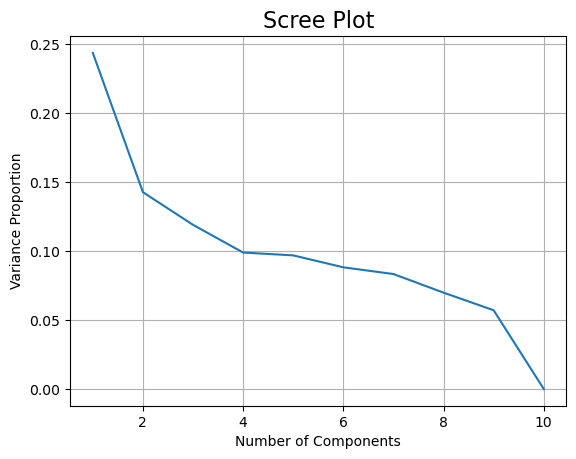

In [11]:
plt.plot(pcomp, exp_var)
plt.title('Scree Plot', fontsize=16)
plt.xlabel('Number of Components')
plt.ylabel('Variance Proportion')
plt.grid()
plt.show()

In [12]:
pd.DataFrame({
    'Explained Variance': pca.explained_variance_,
    'Explained Variance Ratio': exp_var,
}, index=['PCA1', 'PCA2','PCA3','PCA4','PCA5','PCA6','PCA7','PCA8','PCA9','PCA10'])

,Explained Variance,Explained Variance Ratio
PCA1,1.405734,0.243430
PCA2,0.823692,0.142638
PCA3,0.687255,0.119012
PCA4,0.571458,0.098959
PCA5,0.559608,0.096907
PCA6,0.509689,0.088263
PCA7,0.481633,0.083404
PCA8,0.403895,0.069942
PCA9,0.330249,0.057189
PCA10,0.001472,0.000255
